In [13]:
%%time
#read data
df = pd.read_csv("highDdataLabeled.csv")
y = df[["label"]]
print(y)
X = df.iloc[:,5:df.shape[1]-1]
print(X)

def err_count(y, pred_y):
    return np.sum(y != pred_y)

      label
0         0
1         0
2         0
3         0
4         0
...     ...
9995      0
9996      0
9997      0
9998      0
9999      0

[10000 rows x 1 columns]
      natural flavor  citric acid  salt  folic acid)  niacin  sugar  water  \
0                0.0          0.0   0.0          0.0     0.0    0.0    0.0   
1                0.0          0.0   1.0          0.0     0.0    1.0    0.0   
2                0.0          0.0   0.0          0.0     0.0    0.0    0.0   
3                0.0          0.0   0.0          0.0     0.0    0.0    0.0   
4                0.0          0.0   0.0          0.0     0.0    0.0    0.0   
...              ...          ...   ...          ...     ...    ...    ...   
9995             0.0          0.0   0.0          0.0     0.0    0.0    0.0   
9996             0.0          0.0   0.0          0.0     0.0    0.0    0.0   
9997             0.0          0.0   0.0          0.0     0.0    0.0    0.0   
9998             0.0          0.0   0.0          0

In [28]:
%%time
# MLP
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np


#try different parameters
#PSO
clf = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)

clf.fit(X,y)
pred_y = clf.predict(X)

Ein_MLP = err_count(np.array(y)[:,0], pred_y)
Ein_MLP = Ein_MLP / y.shape[0]
print("Ein_MLP", Ein_MLP)


Ein_MLP 0.0038
Wall time: 274 ms


In [26]:
%%time
#SVM
from sklearn import svm

clf = svm.SVC()

clf.fit(X,y)
pred_y = clf.predict(X)
Ein_SVM = err_count(np.array(y)[:,0], pred_y)
Ein_SVM = Ein_SVM / y.shape[0]
print("Ein_SVM", Ein_SVM / y.shape[0])


Ein_SVM 1e-08
Wall time: 151 ms


[0.0038, 0.0001]


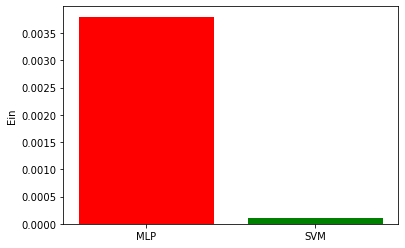

In [27]:
#Comparison of Ein

import matplotlib.pyplot as plt
 
name_list = ['MLP','SVM']
num_list = [Ein_MLP, Ein_SVM]
print(num_list)
plt.bar(range(len(num_list)), num_list,color='rgb',tick_label=name_list)
plt.ylabel("Ein")
plt.show()

In [ ]:
# test set
test train split
